# Cambiar el código de la función de correlación con estimador de Landy-Salay, para que sea anisotrópico y guarde la componente de cada distancia en X y Y.

## a) Con este código calcular la función de correlación anisotrópica del ejercicio anterior y graficarla como gráfica de densidad en 2d (se puede usar imshow de matplotlib)

In [1]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import math

Modificamos el estimador de Landy - Salay para que genere la correlacion de forma anisotropica

In [111]:
def distancia(x1,y1):
    x = []
    y = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            x.append(np.abs(x1[i] - x1[j]))
            y.append(np.abs(y1[i] - y1[j]))    
            j = j + 1
        i= i + 1
    return x, y

def distanciadr(x1,y1, xr, yr):
    x = []
    y = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(xr):
            x.append(np.abs(x1[i] - xr[j]))
            y.append(np.abs(y1[i] - yr[j]))
            j = j + 1
        i= i + 1
    return x, y

def flasz(xm, ym, xr, yr, lcaja, nb, l1, l2): # Landy - Szalay
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmax, dmay = distancia(xm, ym) 
    drax, dray = distancia(xr, yr) 
    ddrx, ddry = distanciadr(xm, ym, xr, yr) 
    
    dd, nbm = np.histogram(dmax, bins = nb)
    rr, nbr = np.histogram(drax, bins = nb)
    dr, nbrd = np.histogram(ddrx, bins = nb)

    dd2, nbm2 = np.histogram(dmay, bins = nb)
    rr2, nbr2 = np.histogram(dray, bins = nb)
    dr2, nbrd2 = np.histogram(ddry, bins = nb)
    
    plt.figure()
    plt.title("Histograma X")
    
    plt.hist(drax, bins=nb, color = 'r' , alpha =0.5)
    plt.hist(ddrx, bins=nb, color = 'g' , alpha =0.5)
    plt.hist(dmax, bins=nb, color = 'y' , alpha =0.5)  
    plt.figure()
    plt.title("Histograma Y")
    
    plt.hist(dray, bins=nb, color = 'r' , alpha =0.5)
    plt.hist(ddry, bins=nb, color = 'g' , alpha =0.5)    
    plt.hist(dmay, bins=nb, color = 'y' , alpha =0.5)
    
    co = 1 + (dd / rr) * ((nrd / n) ** 2) - 2 * (dr / rr) * (nrd / n) 
    co2 = 1 + (dd2 / rr2) * ((nrd / n) ** 2) - 2 * (dr2 / rr2) * (nrd / n)     
    
    return co, co2

def flasz2(xm, ym, xr, yr, lcaja, nb, l1, l2): # Landy - Szalay
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmax, dmay = distancia(xm, ym) 
    drax, dray = distancia(xr, yr) 
    ddrx, ddry = distanciadr(xm, ym, xr, yr) 
    
    dd, nbm = np.histogram(dmax, bins = nb)
    rr, nbr = np.histogram(drax, bins = nb)
    dr, nbrd = np.histogram(ddrx, bins = nb)

    dd2, nbm2 = np.histogram(dmay, bins = nb)
    rr2, nbr2 = np.histogram(dray, bins = nb)
    dr2, nbrd2 = np.histogram(ddry, bins = nb)
    
    
    plt.figure()
    plt.title("Histograma X REDSHIFT")

    plt.hist(drax, bins=nb, color = 'r' , alpha =0.5)
    plt.hist(ddrx, bins=nb, color = 'g' , alpha =0.5)
    plt.hist(dmax, bins=nb, color = 'y' , alpha =0.5)
    plt.figure()  
    plt.title("Histograma Y REDSHIFT")

    plt.hist(dray, bins=nb, color = 'r' , alpha =0.5)
    plt.hist(ddry, bins=nb, color = 'g' , alpha =0.5)  
    plt.hist(dmay, bins=nb, color = 'y' , alpha =0.5)

    co = 1 + (dd / rr) * ((nrd / n) ** 2) - 2 * (dr / rr) * (nrd / n) 
    co2 = 1 + (dd2 / rr2) * ((nrd / n) ** 2) - 2 * (dr2 / rr2) * (nrd / n)     
    
    return co, co2


### Generamos la funcion que genere el mapa de velocidad del arreglo ingresado.

In [3]:
def corrimientoalrojo(x1, y1, lcaja, vfrac):
    xnew = []
    ynew = []
    for i in range(len(x1) - 0):
        distancia  = lcaja
        for j in range(len(x1)):           
            if i != j:
                radio = pow((x1[i] - x1[j]) ** 2 + (y1[i] - y1[j]) ** 2, 0.5)
                if radio < distancia:
                    distancia = radio
                    x0 = x1[j]
                    y0 = y1[j]               
        distancia = pow(((x1[i] - x0) ** 2 + (y1[i] - y0) ** 2), 0.5)
        velocidad = distancia * vfrac
        if y0 - y1[i] > 0:
            theta = math.atan((x1[i] - x0)/(y1[i] - y0))
            vy = velocidad * math.cos(theta)
        if y0 - y1[i] < 0:
            theta =  math.atan((x1[i] - x0)/(y1[i] - y0))
            vy = -1 * velocidad * math.cos(theta)
        if y0 - y1[i] == 0:
            vy = 0   
        xnew.append(x1[i])
        ynew.append(y1[i] + vy)

    return xnew, ynew
    
       

Funcion para generar anillos aleatorios

In [4]:
def construyeanillo(radio, radioint, n):
    xx2 = []
    yy2 = []
    u = 0
    while u < (n):
        fx = np.random.uniform(-radio, radio)
        fy = np.random.uniform(-radio, radio)
        rad = math.sqrt(math.pow(fx, 2) + math.pow(fy, 2))
        if rad <= radio:
            if rad >= radioint:
                xx2.append(fx + radio)
                yy2.append(fy + radio)
                u += 1
    return xx2, yy2

Funcion para comparar la funcion de correlacion de los datos con y sin corrimiento al rojo

In [41]:
def corraniso(x11, y11, x12, y12, x13, y13, lcaja, nb, l1, l2):
    
    m, n = flasz(x11, y11, x13, y13, lcaja, nb, l1, l2)
    m2, n2 = flasz2(x12, y12, x13, y13, lcaja, nb, l1, l2)
    x = np.linspace(0, lcaja, len(m))

    plt.figure(figsize=(15,5))
    plt.plot(x, m, 'bo-', label='$Landy - Szalay (x)$', color = 'k')
    plt.plot(x, m2, 'bo-', label='$Landy - Szalay (x)$ Redshift', color = 'r')
    plt.xlim(l1, l2)
    plt.legend()
    
    plt.figure(figsize=(15,5))
    plt.plot(x, n, 'bo-', label='$Landy - Szalay (y)$', color = 'k')
    plt.plot(x, n2, 'bo-', label='$Landy - Szalay (y)$ Redshift', color = 'r')
    plt.xlim(l1, l2)
    plt.legend()
    




## Calculamos la funcion de correlacion con los datos del anillo y la caja de aleatorios, graficamos en la misma figura la correlacion de los datos con corrimiento al rojo.

In [22]:
lcaja  = 1000
radio = 500
radioint = 350
n = 1000

In [23]:
x1, y1 = construyeanillo(radio, radioint, n)

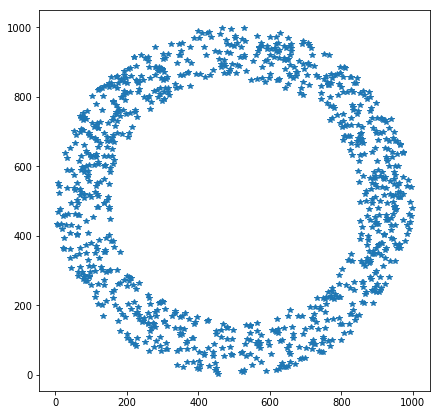

In [24]:
plt.figure(figsize=(7, 7))
plt.plot(x1,y1, "*")

Aplicamos la funcion para el mapa de velocidades sobre los puntos del anillo

In [25]:
x2, y2 = corrimientoalrojo(x1, y1, lcaja, .1)

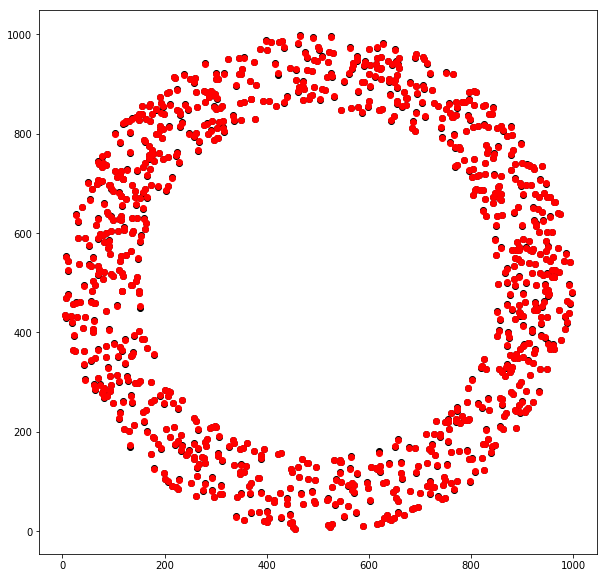

In [26]:
plt.figure(figsize=(10, 10))
plt.plot(x1, y1, "bo", color = 'k')
plt.plot(x2, y2, "bo", color = 'r')

In [27]:
x3 = np.random.uniform(0, lcaja, len(x2))
y3 = np.random.uniform(0, lcaja, len(x2))

Text(0,0.5,'EJE Y')

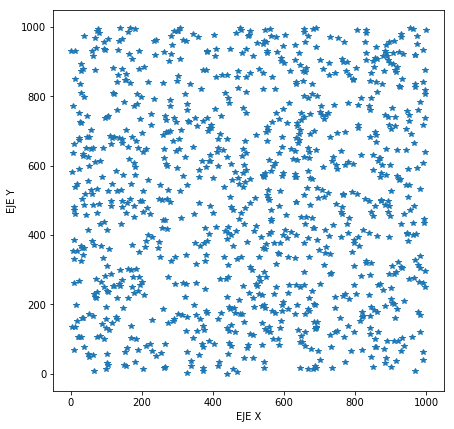

In [28]:
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(x3,y3, "*")
plt.xlabel("EJE X")
plt.ylabel("EJE Y")

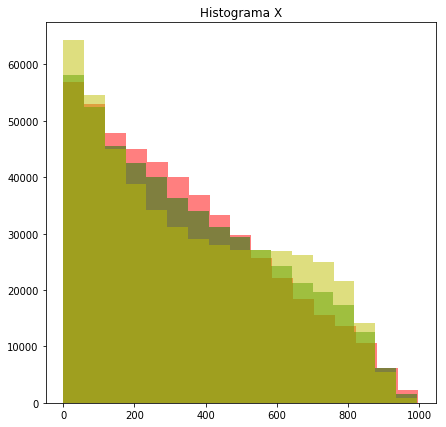

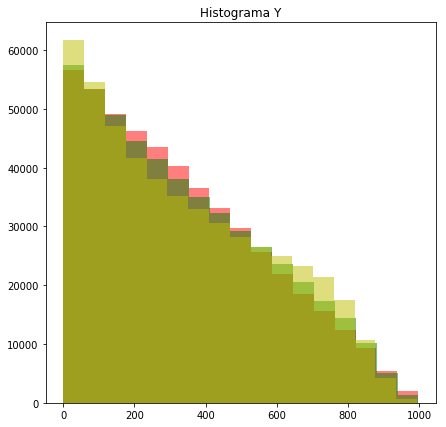

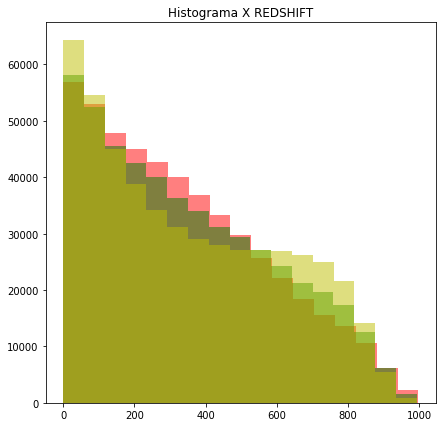

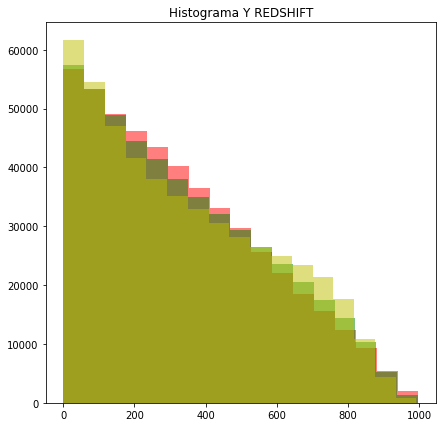

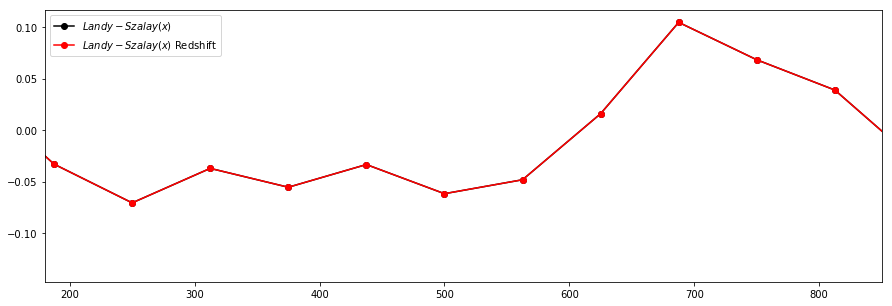

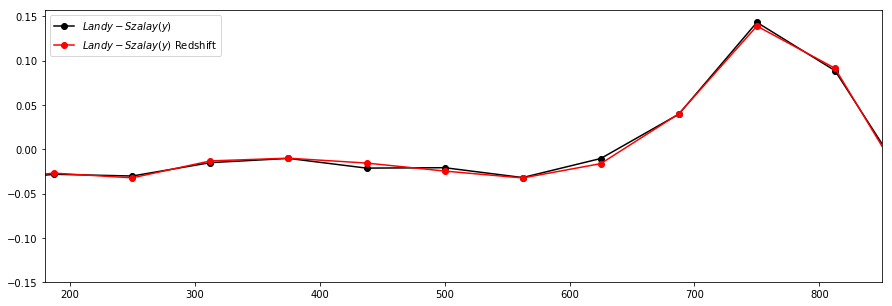

In [112]:
corraniso(x1, y1, x2, y2, x3, y3, 1000, 17, 180, 850)

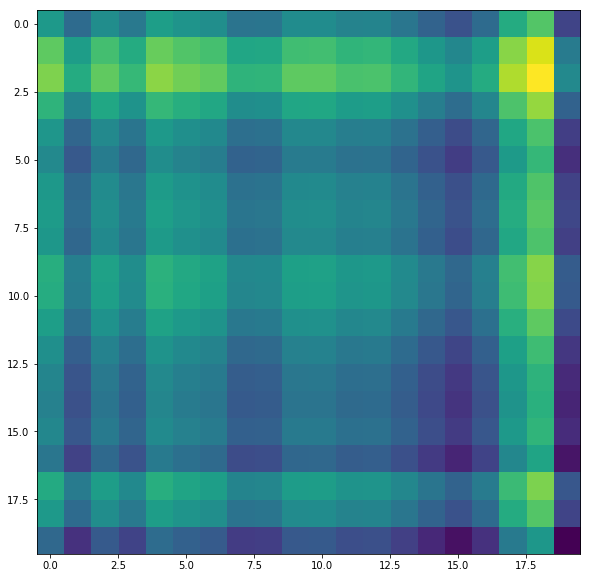

In [116]:
plt.figure(figsize=(10, 10))
X, Y = np.meshgrid(a1,b1)
fxy = X + Y
plt.imshow(fxy)

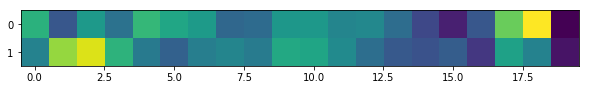

In [121]:
plt.figure(figsize=(10, 10))
r = []
r.append(a1)
r.append(b1)

plt.imshow(r)

## Usamos una densidad menor en el anillo

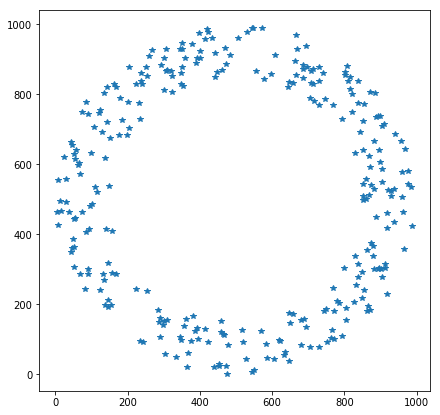

In [8]:
x5, y5 = construyeanillo(radio, radioint, 300)
plt.figure(figsize=(7, 7))
plt.plot(x5,y5, "*")

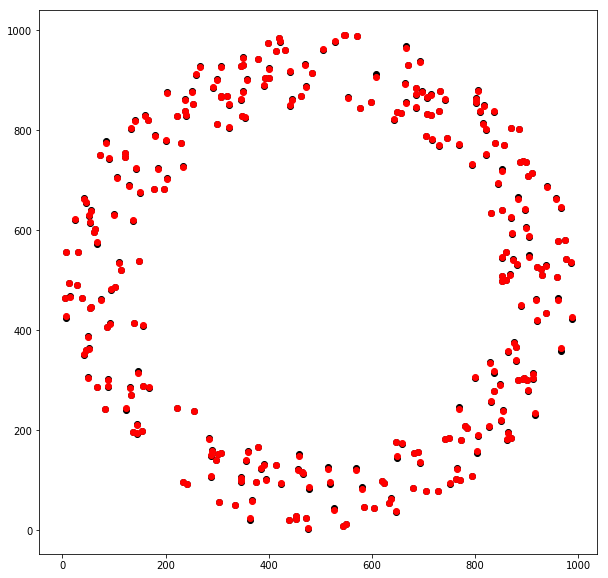

In [9]:
x6, y6 = corrimientoalrojo(x5, y5, lcaja, .1)
plt.figure(figsize=(10, 10))
plt.plot(x5, y5, "bo", color = 'k')
plt.plot(x6, y6, "bo", color = 'r')

In [10]:
x7 = np.random.uniform(0, lcaja, len(x5))
y7 = np.random.uniform(0, lcaja, len(x5))

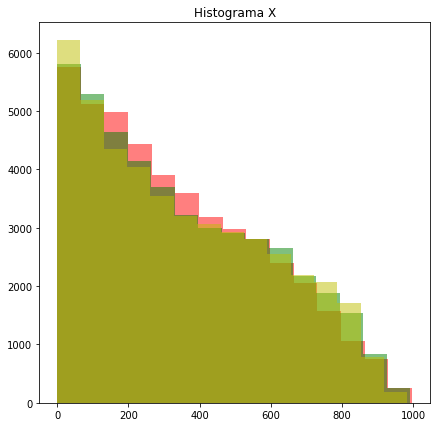

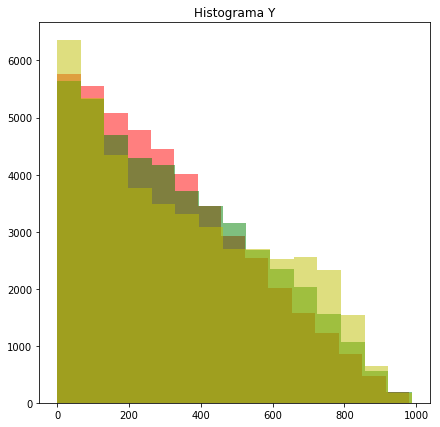

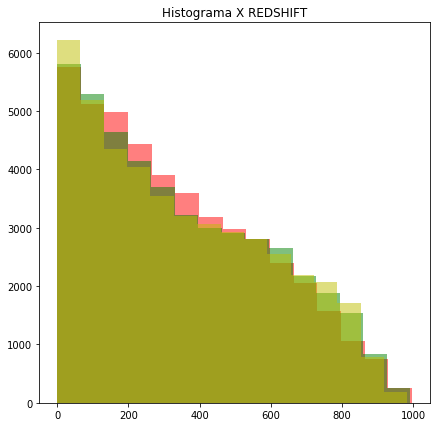

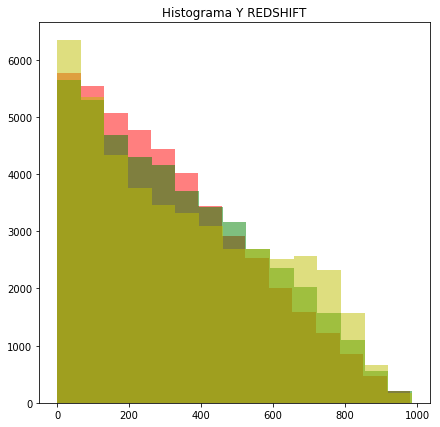

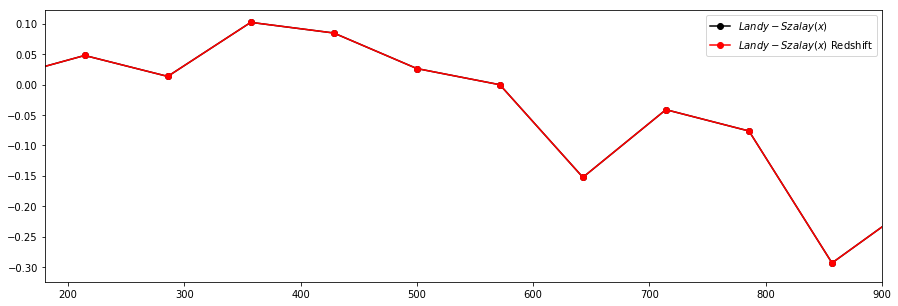

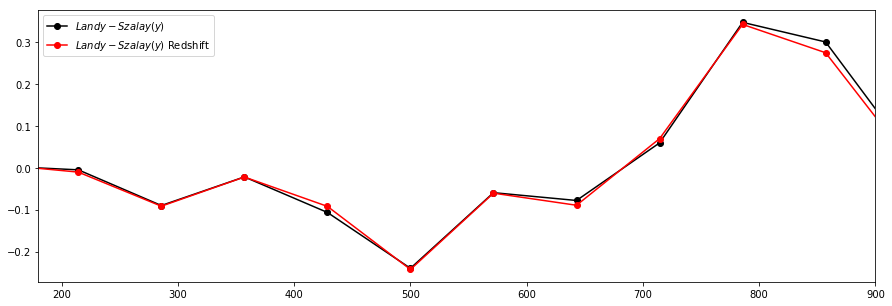

In [113]:
corraniso(x5, y5, x6, y6, x7, y7, 1000, 15, 180, 900)

## Usamos una densidad menor en el anillo de nuevo

In [91]:
xa, ya = construyeanillo(radio, radioint, 150)
xb, yb = corrimientoalrojo(xa, ya, lcaja, .1)
xc = np.random.uniform(0, lcaja, len(xa))
yc = np.random.uniform(0, lcaja, len(xa))

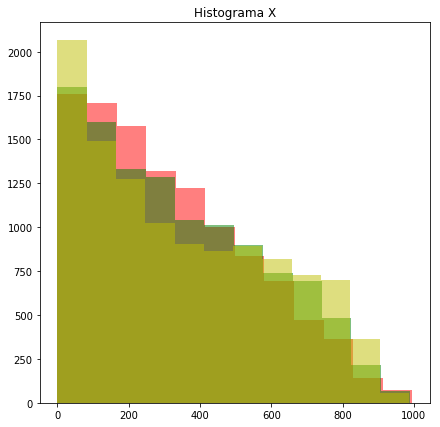

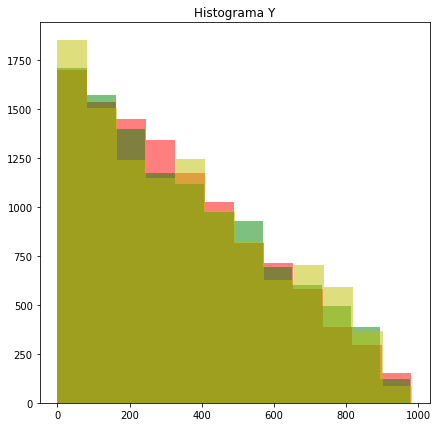

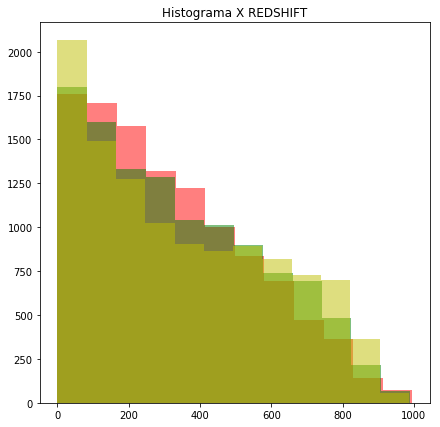

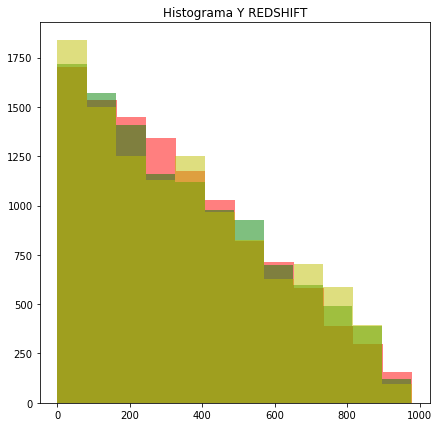

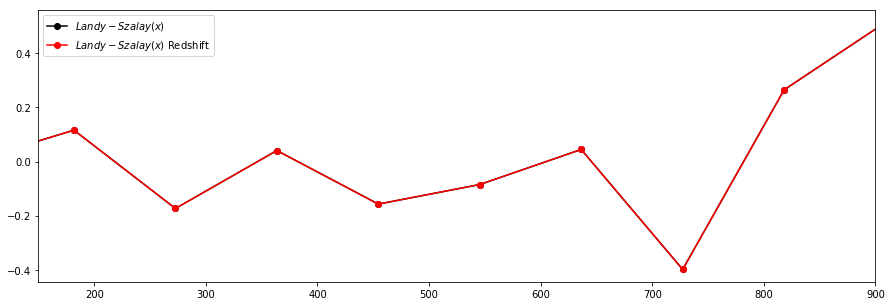

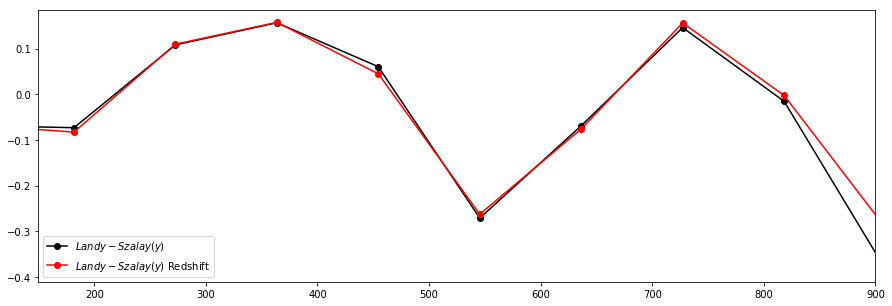

In [114]:
corraniso(xa, ya, xb, yb, xc, yc, 1000, 12, 150, 900)

# Incrementamos el tamaño de la caja

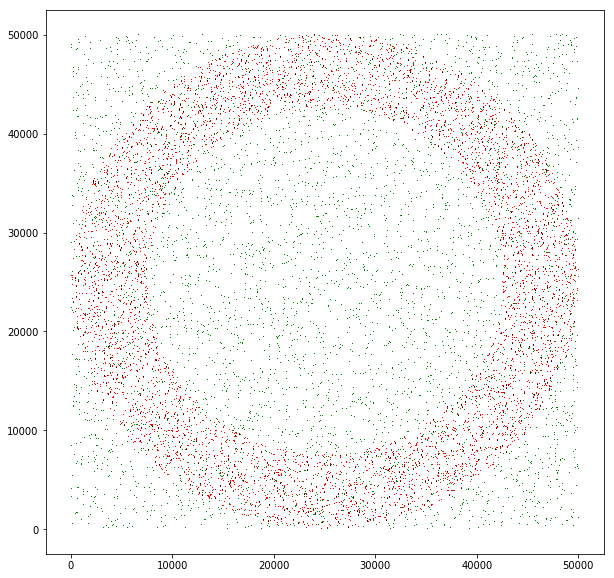

In [115]:
long = 50000
npo = 5000

x10, y10 = construyeanillo(long/2, long/2*.7, npo)
x11, y11 = corrimientoalrojo(x10, y10, long, .1)

x12 = np.random.uniform(0, long, len(x11))
y12 = np.random.uniform(0, long, len(x11))

plt.figure(figsize=(10, 10))
plt.plot(x10, y10, ",", color = 'k')
plt.plot(x11, y11, ",", color = 'r')
plt.plot(x12, y12, ",", color = 'g')



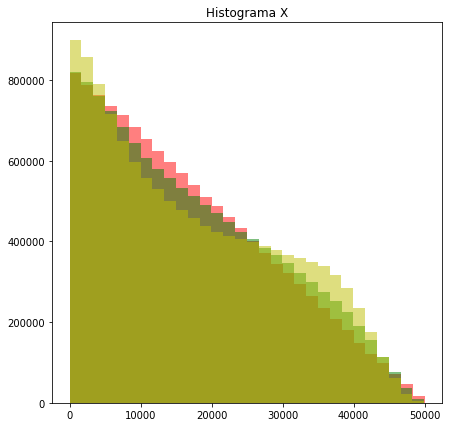

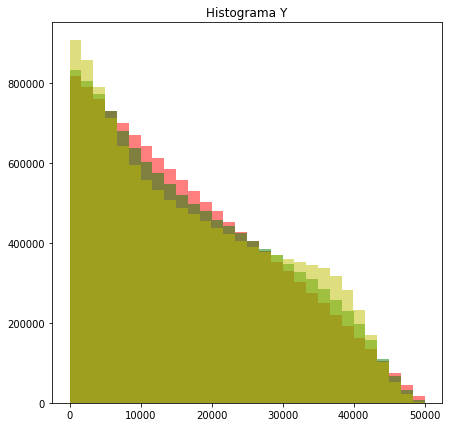

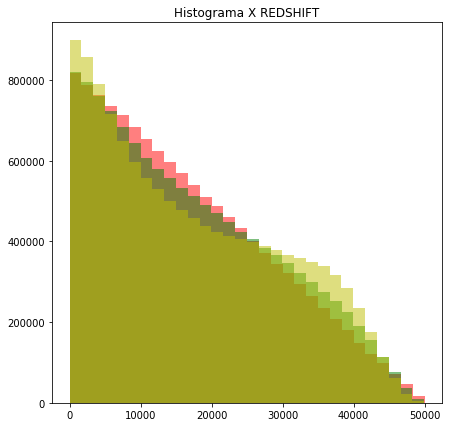

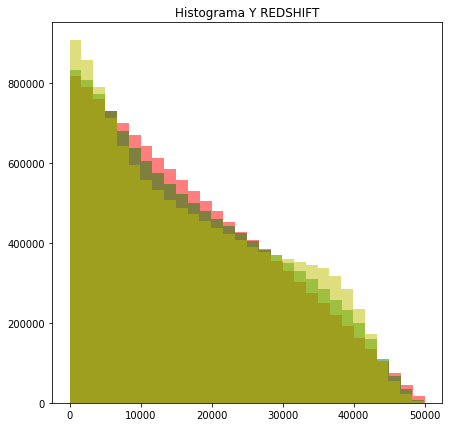

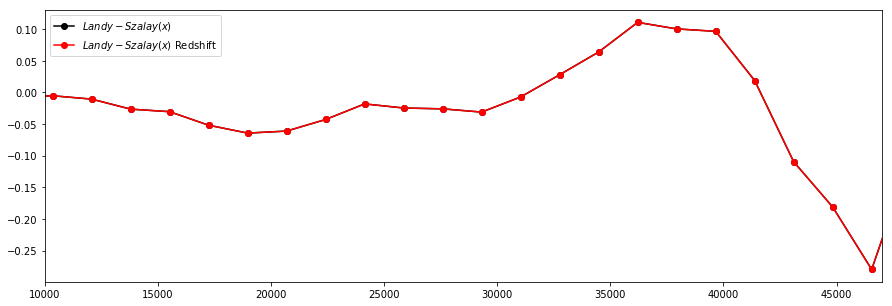

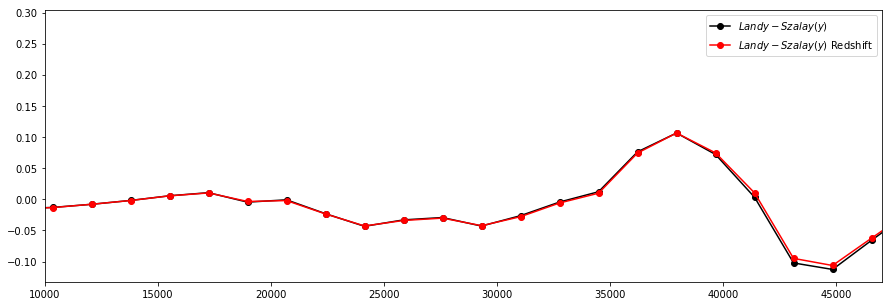

In [116]:
corraniso(x10, y10, x11, y11, x12, y12, long, 30, 10000, 47000)

## Disminuimos la densidad

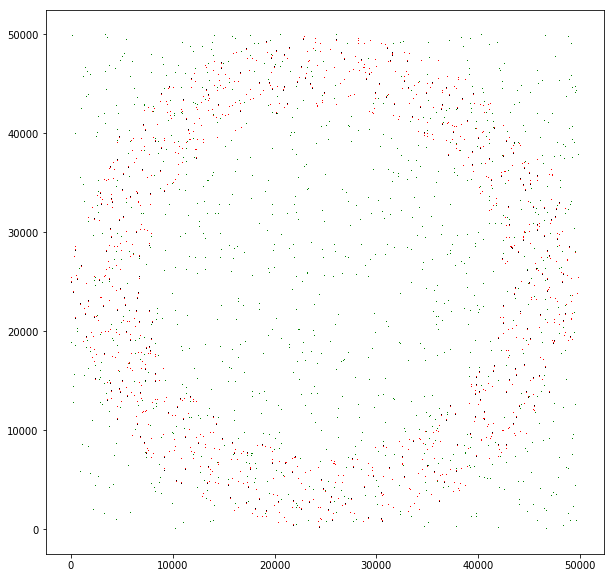

In [117]:
long = 50000
npo = 1000

x10, y10 = construyeanillo(long/2, long/2*.7, npo)
x11, y11 = corrimientoalrojo(x10, y10, long, .1)

x12 = np.random.uniform(0, long, len(x11))
y12 = np.random.uniform(0, long, len(x11))

plt.figure(figsize=(10, 10))
plt.plot(x10, y10, ",", color = 'k')
plt.plot(x11, y11, ",", color = 'r')
plt.plot(x12, y12, ",", color = 'g')


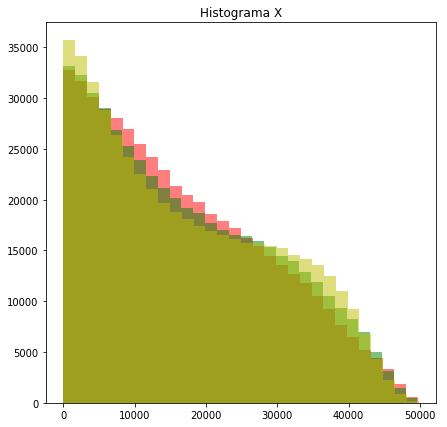

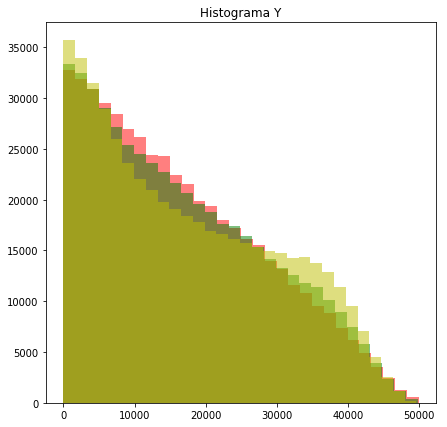

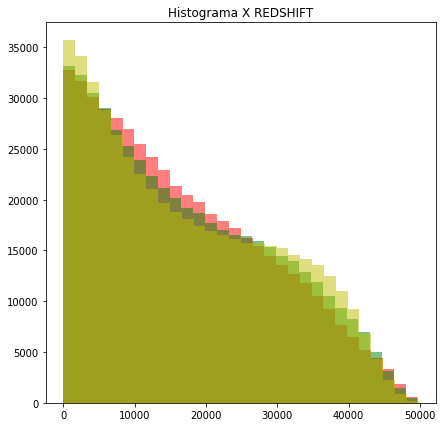

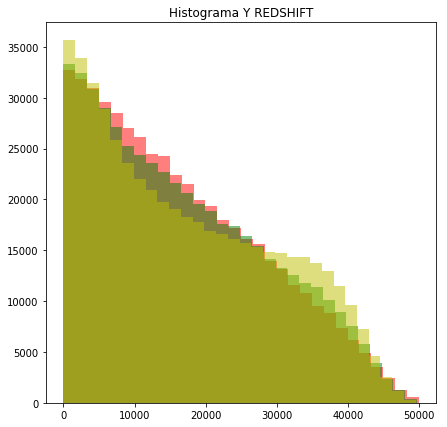

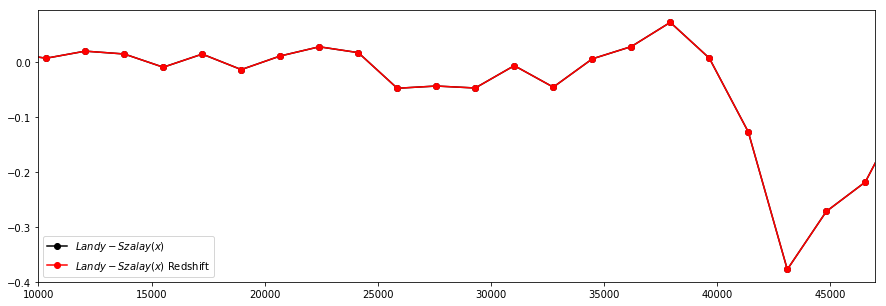

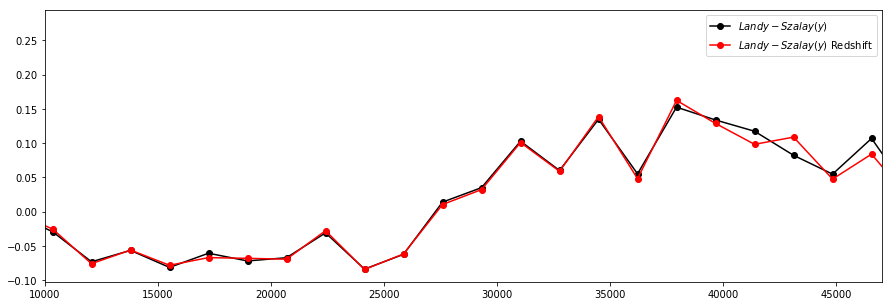

In [118]:
corraniso(x10, y10, x11, y11, x12, y12, long, 30, 10000, 47000)

## Disminuimos la densidad de nuevo

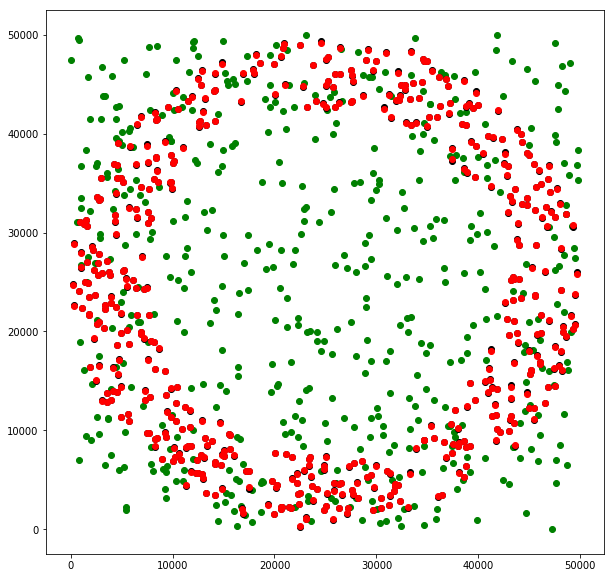

In [119]:
long = 50000
npo = 500

x10, y10 = construyeanillo(long/2, long/2*.7, npo)
x11, y11 = corrimientoalrojo(x10, y10, long, .1)

x12 = np.random.uniform(0, long, len(x11))
y12 = np.random.uniform(0, long, len(x11))

plt.figure(figsize=(10, 10))
plt.plot(x12, y12, "bo", color = 'g')
plt.plot(x10, y10, "bo", color = 'k')
plt.plot(x11, y11, "bo", color = 'r')


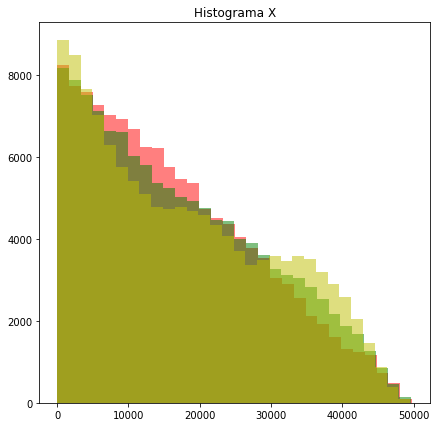

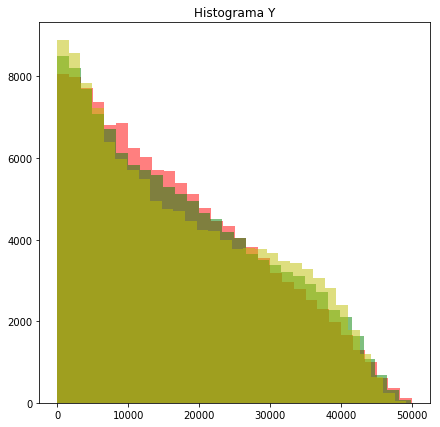

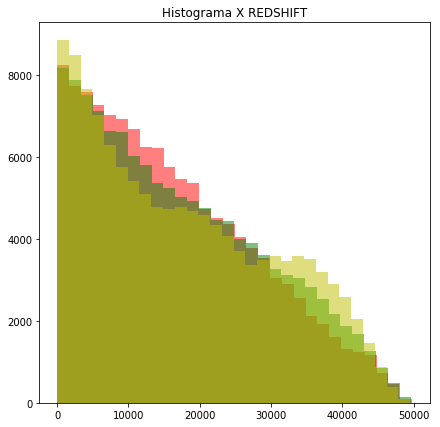

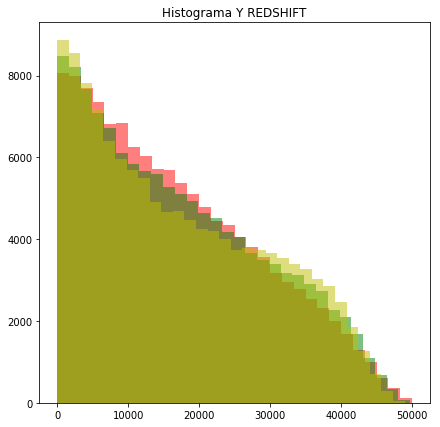

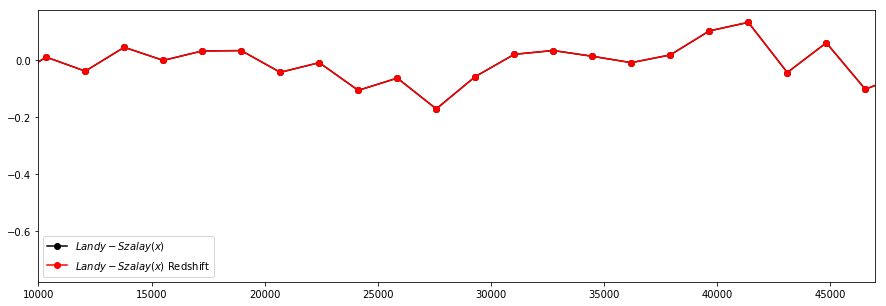

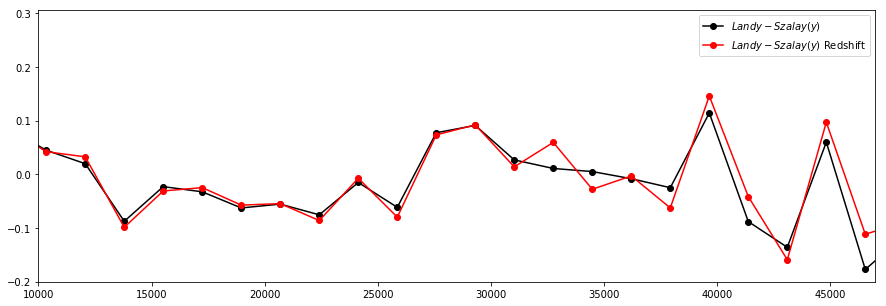

In [120]:
corraniso(x10, y10, x11, y11, x12, y12, long, 30, 10000, 47000)

## Disminuimos la densidad de nuevo

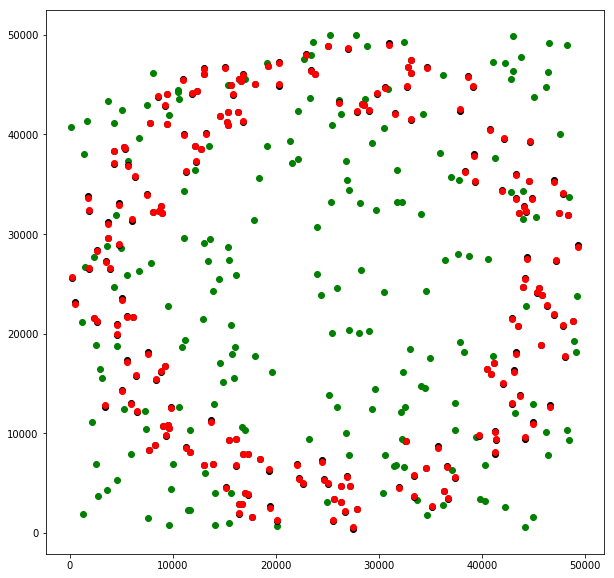

In [121]:
long = 50000
npo = 200

x10, y10 = construyeanillo(long/2, long/2*.7, npo)
x11, y11 = corrimientoalrojo(x10, y10, long, .1)

x12 = np.random.uniform(0, long, len(x11))
y12 = np.random.uniform(0, long, len(x11))

plt.figure(figsize=(10, 10))
plt.plot(x12, y12, "bo", color = 'g')
plt.plot(x10, y10, "bo", color = 'k')
plt.plot(x11, y11, "bo", color = 'r')


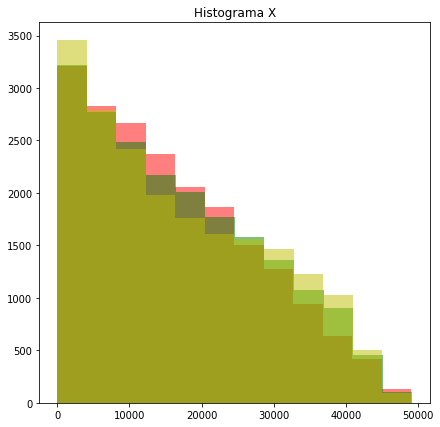

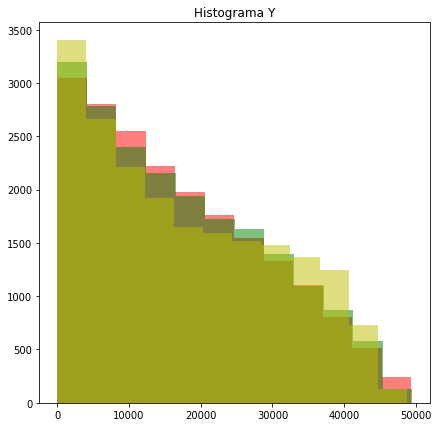

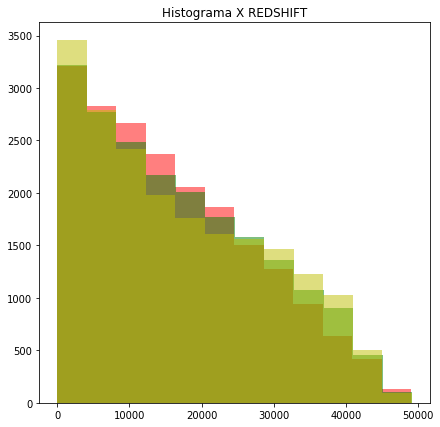

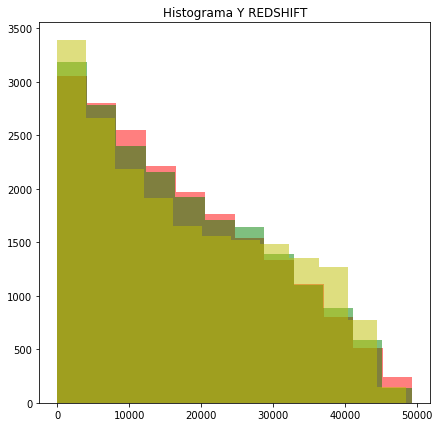

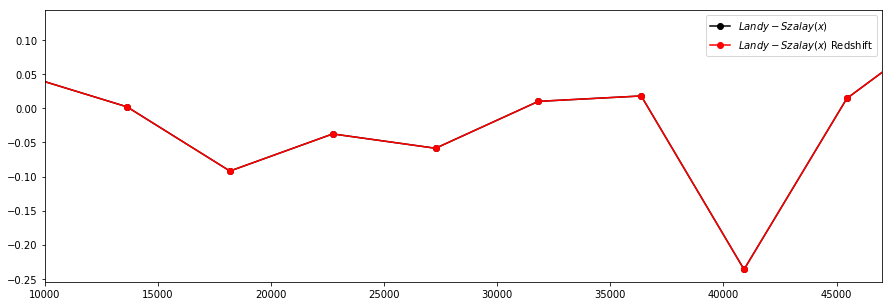

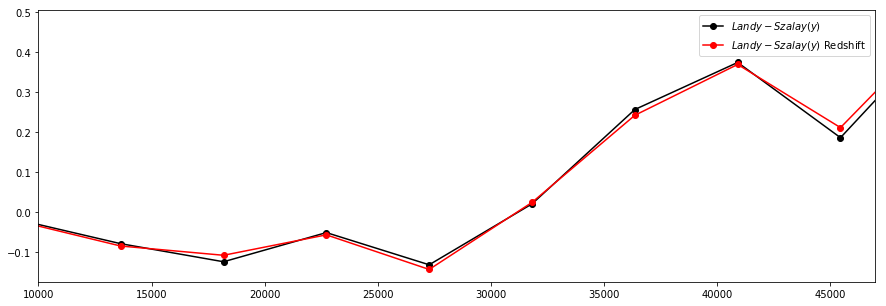

In [122]:
corraniso(x10, y10, x11, y11, x12, y12, long, 12, 10000, 47000)

## b) (BONUS) Descomponer en la base de Legendre para encontrar encontrar el monopolo, cuadrupolo y hexadecapolo. Graficarlos todos en un mismo plot. [ Para realizar este ejercicio debes cambiar la función de correlación a coordenadas polares ]